In [254]:
import numpy as np
import matplotlib.pyplot as plt
import math
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn
import gpytorch

In [255]:
def get_target_function(x):
    return x * torch.sin(x + 5)

def get_training_data(seed=None):
    if seed is not None:
        torch.manual_seed(seed)
    X = torch.linspace(-5, 5, 2000)
    y = get_target_function(X) + torch.normal(0, 1, size=X.size())
    return X, y

X, y = get_training_data(seed=42)

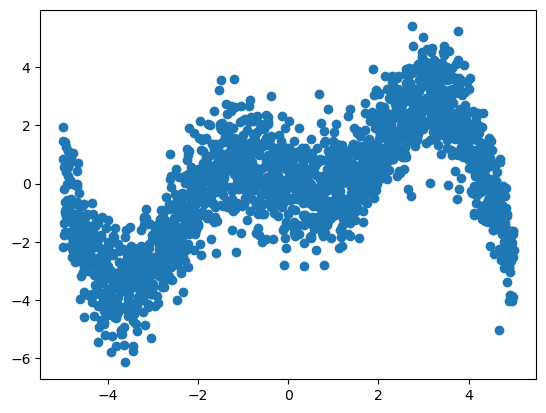

In [256]:
plt.scatter(X.data.numpy(), y.data.numpy())
plt.show()

In [257]:
def define_model(dropout_prob=0, depth=1, width=100):
    starting_layer = [bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1, out_features=100),
        nn.ReLU()]
    middle_layers = [nn.Dropout(p=dropout_prob),
        bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=100),
        nn.ReLU()]*depth
    ending_layer = [bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=1)]
    layers = starting_layer + middle_layers + ending_layer
    model = nn.Sequential(*layers)
    return model

def define_unique_model(dropout_prob=0):
    model = nn.Sequential(
        bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1, out_features=100),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=50),
        nn.Tanh(),
        nn.Dropout(p=0.1),
        bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=50, out_features=1),
    )
    return model

In [258]:
def get_dist(x_test, model):
    model = model_nn
    models_result = np.array([model(x_test).data.numpy() for k in range(10000)])
    models_result = models_result[:,:,0]    
    models_result = models_result.T
    mean_values = np.array([models_result[i].mean() for i in range(len(models_result))])
    std_values = np.array([models_result[i].std() for i in range(len(models_result))])
    return mean_values, std_values

In [259]:
def plot_model(x_test, mean_values, std_values):
    plt.figure(figsize=(10,8))
    plt.scatter(X, y, alpha=0.1, label="Training Data")
    plt.fill_between(x_test.data.numpy().T[0],
                     mean_values-2.0*std_values,mean_values+2.0*std_values,alpha=0.2,color='navy',label='95% confidence interval')
    plt.plot(x_test.data.numpy(),y_test.data.numpy(),'.',color='darkorange',markersize=4,label='Test set')
    plt.plot(x_test.data.numpy(),mean_values,color='navy',lw=3,label='Predicted Mean Model')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [260]:
def get_test_data():
    X_test = torch.linspace(-5, 5, 500)
    y_test = get_target_function(X_test)
    
    X_test = torch.unsqueeze(X_test, dim=1)
    y_test = torch.unsqueeze(y_test, dim=1)
    return X_test, y_test

X_test, y_test = get_test_data()

In [261]:
model_nn = define_unique_model(dropout_prob=0.5)

mse_loss = nn.MSELoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
# kl weight started as 0.01
kl_weight = 0.01
optimizer_nn = optim.Adam(model_nn.parameters(), lr=0.01)
for step in range(4000):
    pre = model_nn(torch.unsqueeze(X, dim=1))
    mse = mse_loss(pre, torch.unsqueeze(y, dim=1))
    kl = kl_loss(model_nn)
    cost = mse + kl_weight*kl
    optimizer_nn.zero_grad()
    cost.backward()
    optimizer_nn.step()

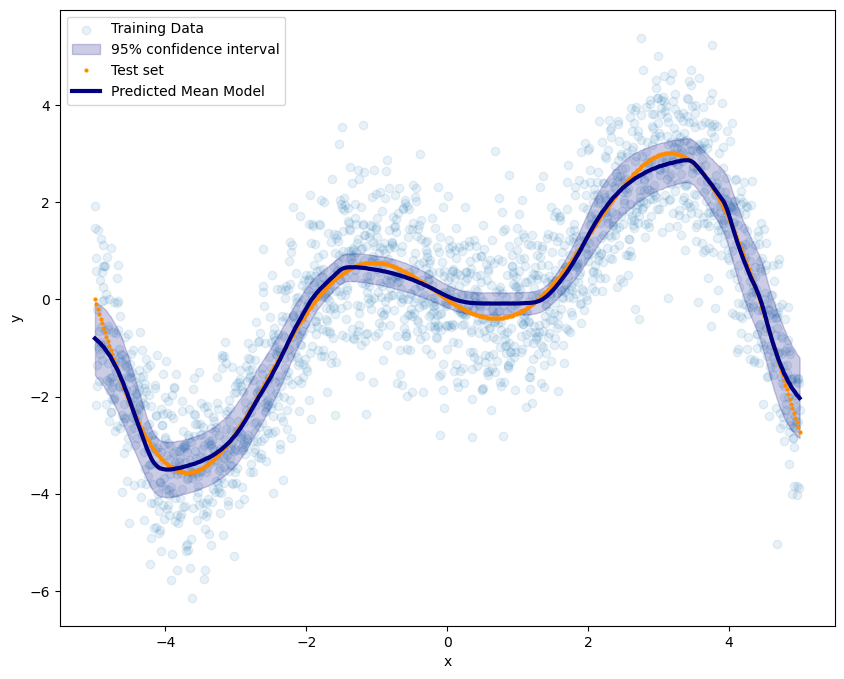

In [262]:
# ReLU then Tanh 2 layers with narrowing 100 to 50 and 2000 data points with noise N(0, 1)
mean_values, std_values = get_dist(X_test, model_nn)

plot_model(X_test,mean_values, std_values)

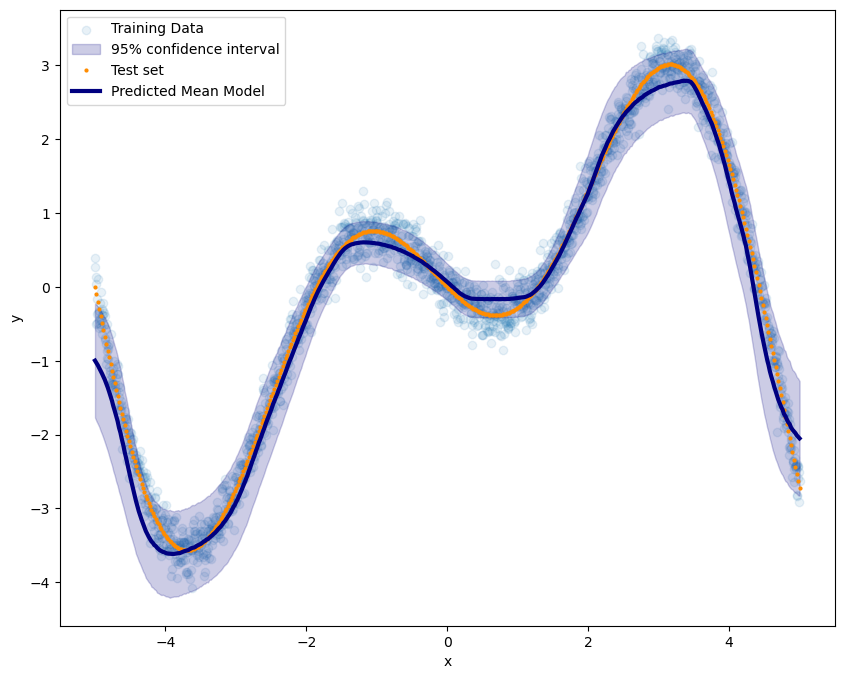

In [253]:
# ReLU then Tanh 2 layers with narrowing 100 to 50 and 2000 data points with noise N(0, 0.2)
mean_values, std_values = get_dist(X_test, model_nn)

plot_model(X_test,mean_values, std_values)

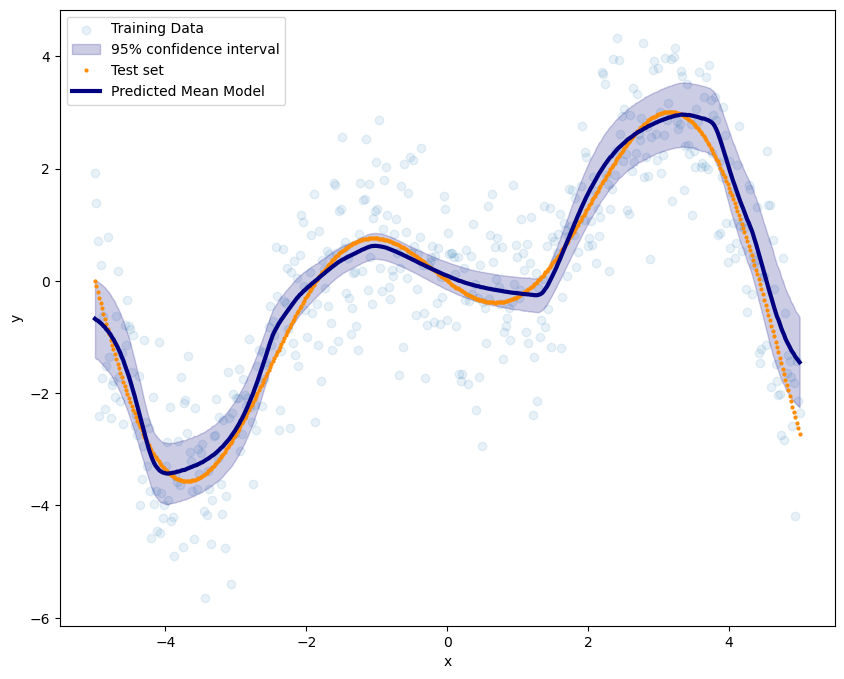

In [190]:
# ReLU then Tanh 2 layers with narrowing
mean_values, std_values = get_dist(X_test, model_nn)

plot_model(X_test,mean_values, std_values)

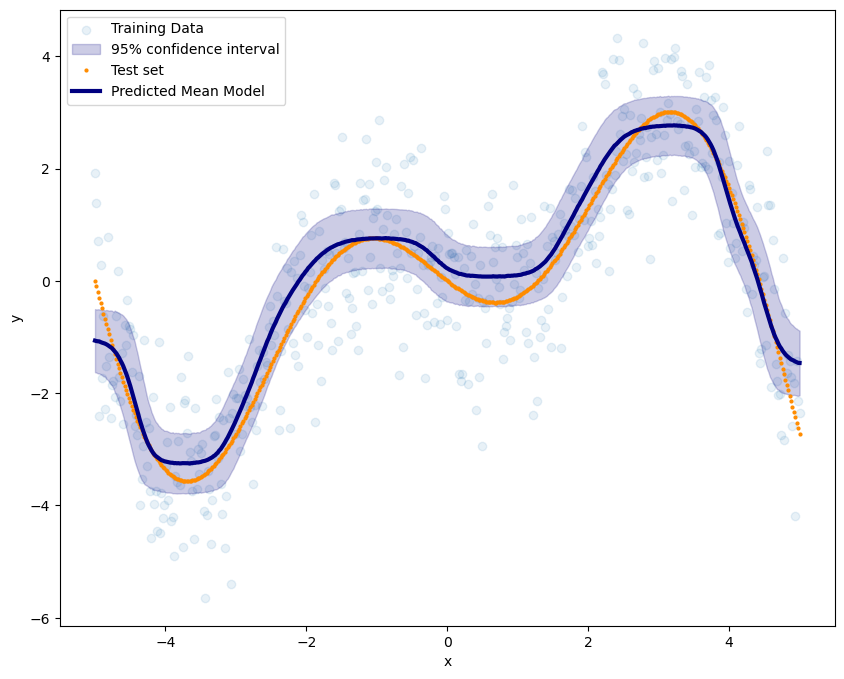

In [162]:
# Tanh 3 layers with kl weight 0.1
mean_values, std_values = get_dist(X_test, model_nn)

plot_model(X_test,mean_values, std_values)

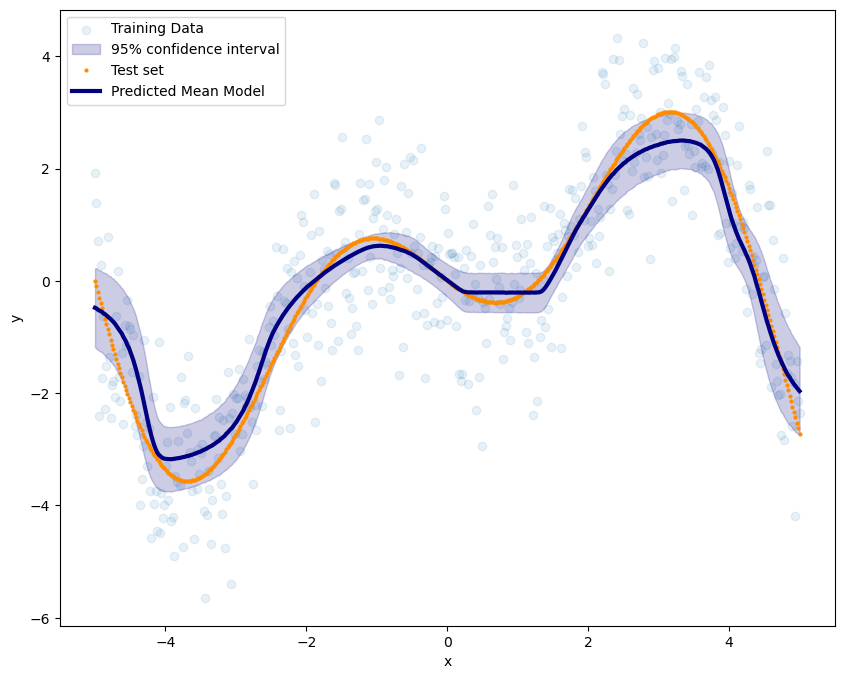

In [153]:
# ReLU then Tanh 3 layers with extra kl weight 0.1
mean_values, std_values = get_dist(X_test, model_nn)

plot_model(X_test,mean_values, std_values)

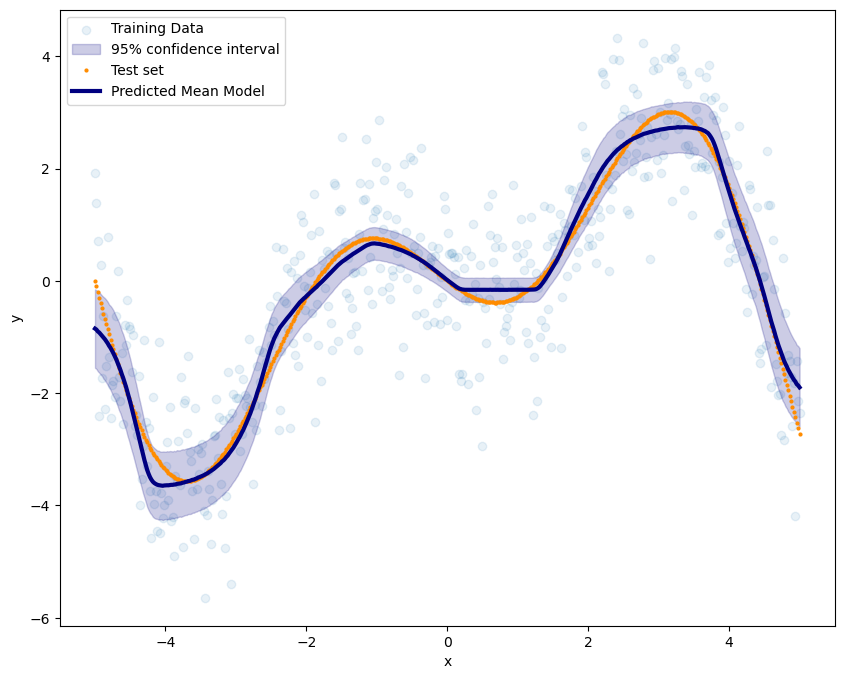

In [142]:
# ReLU then Tanh
mean_values, std_values = get_dist(X_test, model_nn)

plot_model(X_test,mean_values, std_values)

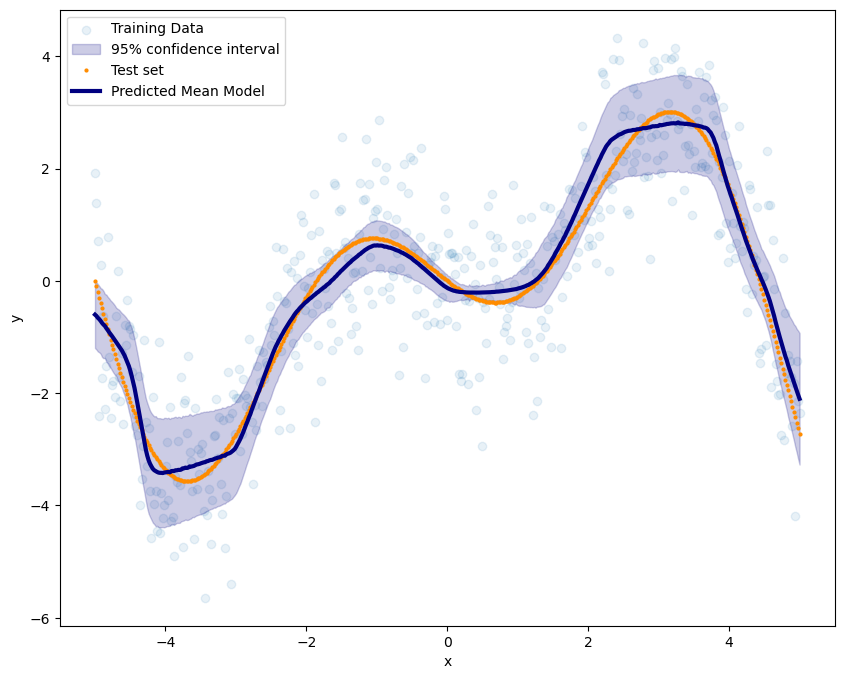

In [133]:
# ReLU
mean_values, std_values = get_dist(X_test, model_nn)

plot_model(X_test,mean_values, std_values)

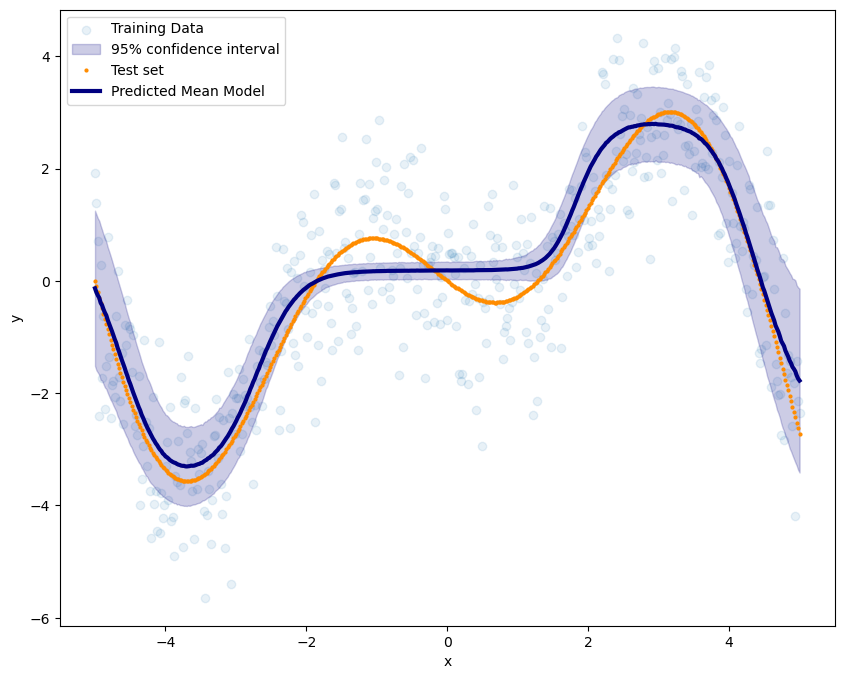

In [124]:
# Sigmoid
mean_values, std_values = get_dist(X_test, model_nn)

plot_model(X_test,mean_values, std_values)

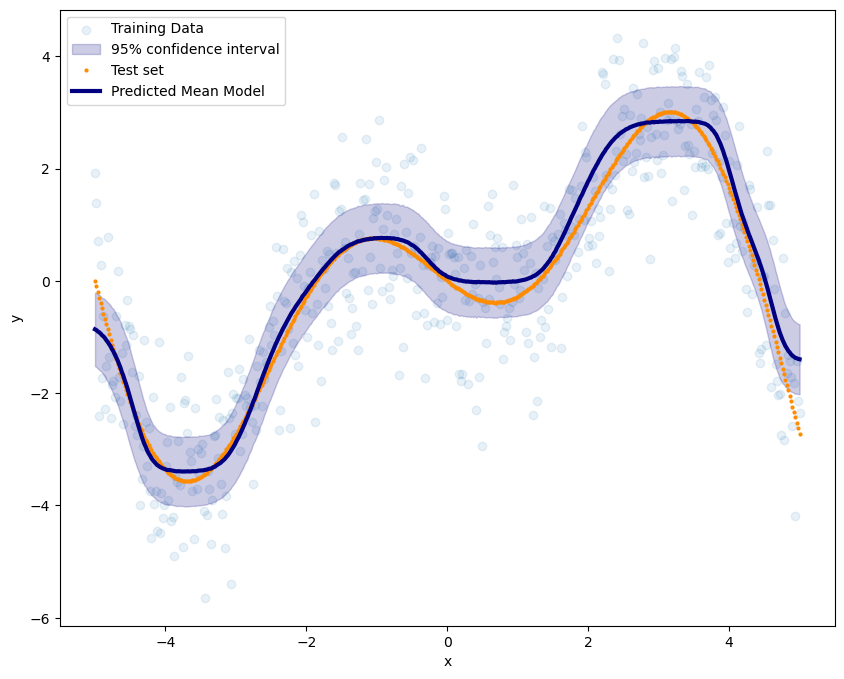

In [110]:
# Tanh
mean_values, std_values = get_dist(X_test, model_nn)

plot_model(X_test,mean_values, std_values)

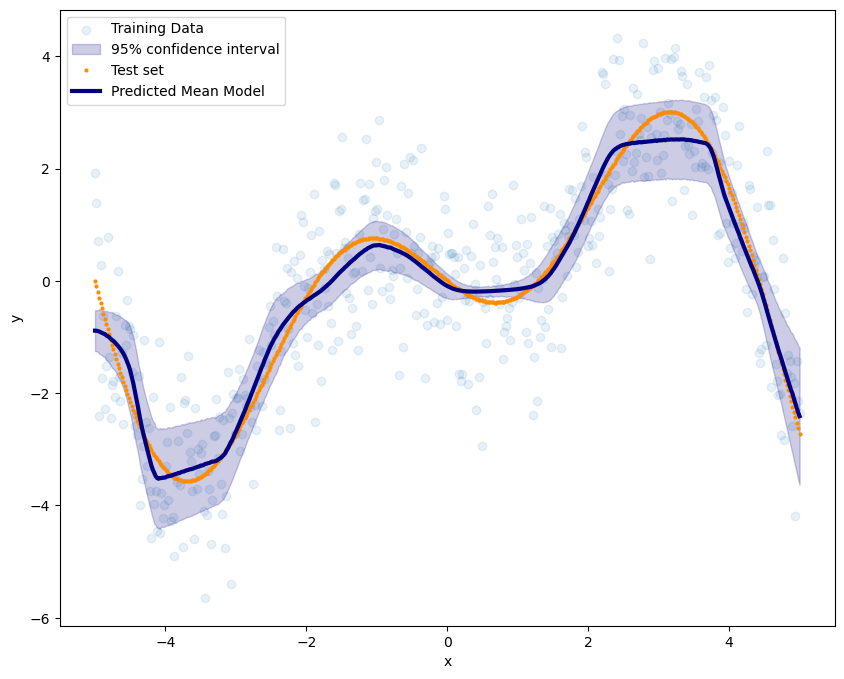

In [101]:
# Leaky ReLU
mean_values, std_values = get_dist(X_test, model_nn)

plot_model(X_test,mean_values, std_values)

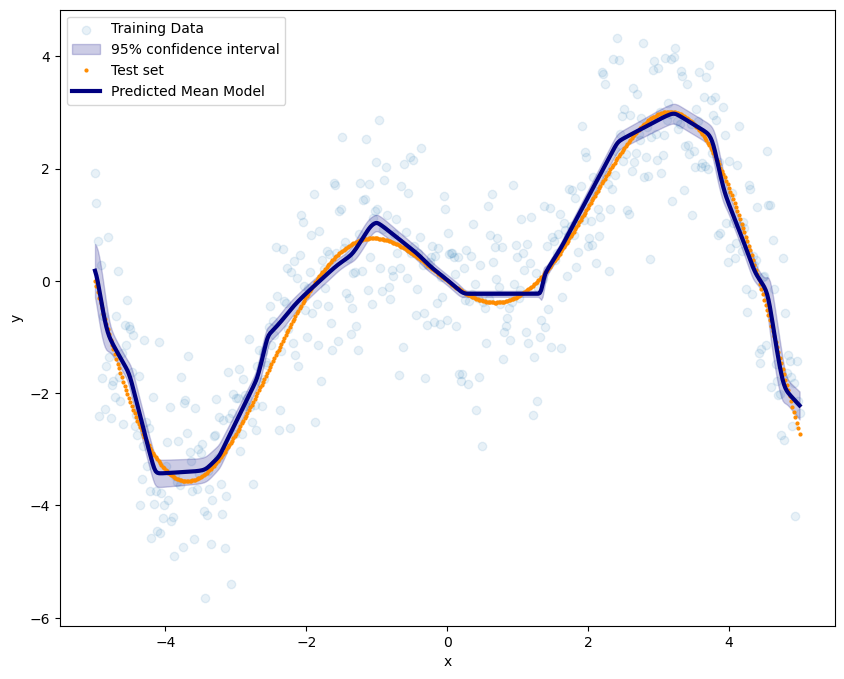

In [36]:
plot_model(X_test, mean_values, std_values)